# Canaries
## Creating an histogram from each of the sarifo rtb time series
(time,qps_cap,qps_eff,avg_lat,max_lat,timeouts,bids)

Parsing data from safirortb.log

In [9]:
!./get_logs.sh 172.19.6.214 100000 canary
!./get_logs.sh 172.19.5.212 100000 silver
!./parse_logs.sh canary
!./parse_logs.sh silver
!ls ../data/

canary.csv  canary.log	silver.csv  silver.log


In [10]:
import numpy as np
import os
from stats_util import Type, get_serie
import math

path = os.getcwd()
path 
canary_ds = np.loadtxt(path + "/../data/canary.csv", delimiter=",")
canary_ds = np.delete(canary_ds, [1,], axis=1)

silver_ds = np.loadtxt(path + "/../data/silver.csv", delimiter=",")
silver_ds = np.delete(silver_ds, [1,], axis=1)


In [3]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=180, facecolor='w', edgecolor='k')
canary = get_serie(canary_ds, Type.qps_cap, None, None)
silver = get_serie(silver_ds, Type.qps_cap, None, None)

<Figure size 2700x1260 with 0 Axes>

(208.85555555555555, 24.419880045261465)

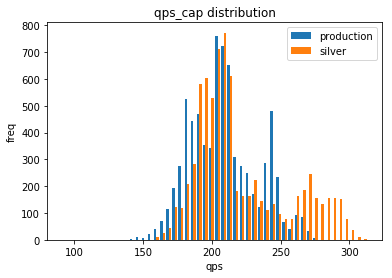

In [4]:
plt.hist([canary, silver], bins=50, label=['production', 'silver'])
plt.title('qps_cap distribution')
plt.xlabel('qps')
plt.ylabel('freq');
plt.legend(loc='upper right')
canary.mean(),math.sqrt(canary.var())

(153.99022757697458, 18.22604711364033)

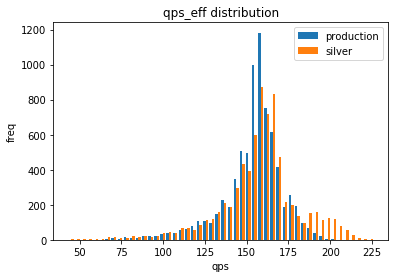

In [5]:
canary = get_serie(canary_ds, Type.qps_eff, None, None)
silver = get_serie(silver_ds, Type.qps_eff, None, None)
plt.hist([canary, silver], bins=50, label=['production', 'silver'])
plt.title('qps_eff distribution')
plt.xlabel('qps')
plt.ylabel('freq');
plt.legend(loc='upper right')
canary.mean(),math.sqrt(canary.var())

(0.004841218206157965, 0.0005655006802122141)

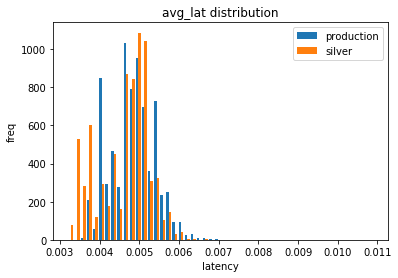

In [6]:
canary = get_serie(canary_ds, Type.avg_lat, None, None)
silver = get_serie(silver_ds, Type.avg_lat, None, None)
plt.hist([canary, silver], bins=50, label=['production', 'silver'])
plt.title('avg_lat distribution')
plt.xlabel('latency')
plt.ylabel('freq');
plt.legend(loc='upper right')
canary.mean(),math.sqrt(canary.var())

(88.34666666666666, 13.549999589995894)

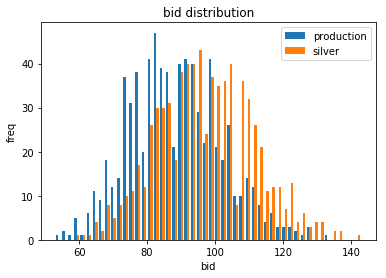

In [12]:
canary = get_serie(canary_ds, Type.bids, None, None)
silver = get_serie(silver_ds, Type.bids, None, None)
plt.hist([canary, silver], bins=50, label=['production', 'silver'])
plt.title('bid distribution')
plt.xlabel('bid')
plt.ylabel('freq');
plt.legend(loc='upper right')
canary.mean(),math.sqrt(canary.var())

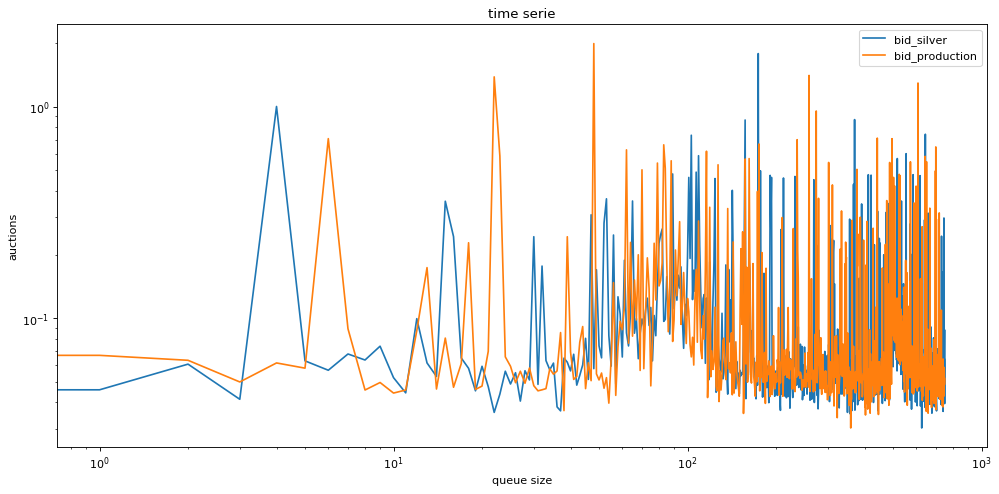

In [11]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')

# plt.plot(silver_ds[:,1], label="qps_cap_silver")
# plt.plot(silver_ds[:, 2], label="qps_eff_silver")
# plt.plot(silver_ds[:, 3], label="avg_lat_silver")
plt.plot(silver_ds[:, 4], label="bid_silver")

# plt.plot(canary_ds[:,1], label="qps_cap_production")
# plt.plot(canary_ds[:, 2], label="qps_eff_production")
# plt.plot(canary_ds[:, 3], label="avg_lat_production")
plt.plot(canary_ds[:, 4], label="bid_production")

#plt.hist(dataset,bins=50)
plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')
plt.title('time serie')
plt.xlabel('queue size')
plt.ylabel('auctions');
plt.legend()
plt.show()